In [4]:
!pip install -qU soundfile librosa pyaudio audiomentations pydub matplotlib

In [4]:
import os
import requests
import tarfile

output_dir = r"C:\Users\jeeva\Videos\Efficient_word_net/test"
os.makedirs(output_dir, exist_ok=True)

file_urls = [
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/0.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/1.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/2.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/3.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/4.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/5.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/6.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/7.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/8.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/9.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/10.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/11.tar.gz",
]



# Function to download a file
def download_file(url, output_dir):
    local_filename = os.path.join(output_dir, url.split("/")[-1])
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return local_filename

# Function to extract .tar.gz files
def extract_tar_gz(file_path, extract_dir):
    with tarfile.open(file_path, "r:gz") as tar:
        tar.extractall(path=extract_dir)
        print(f"Extracted: {file_path}")
    # Check for .tar file and extract it
    tar_file = file_path.replace('.tar.gz', '.tar')
    if os.path.exists(tar_file):
        extract_tar(tar_file, extract_dir)

# Function to extract .tar files
def extract_tar(file_path, extract_dir):
    with tarfile.open(file_path, "r:") as tar:
        tar.extractall(path=extract_dir)
        print(f"Extracted: {file_path}")

# Download and extract all files
for url in file_urls:
    # Download the file
    downloaded_file = download_file(url, output_dir)
    print(f"Downloaded: {downloaded_file}")
    
    # Extract the file
    extract_tar_gz(downloaded_file, output_dir)


Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\0.tar.gz


C:\Users\jeeva\AppData\Local\Temp\ipykernel_2216\2554677718.py:38: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_dir)


Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\0.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\1.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\1.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\2.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\2.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\3.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\3.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\4.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\4.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\5.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\5.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\6.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\6.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\7.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\7.tar.gz
Dow

In [41]:
import librosa
import librosa.display # for waveplots, spectograms, etc
import IPython.display as ipd # for playing files within pythonimport numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import soundfile as sf

In [42]:
SAMPLE_RATE = 16000
AUDIO_WINDOW = 1.0 #seconds
AUDIO_LENGTH = int(AUDIO_WINDOW * SAMPLE_RATE)

In [43]:
def randomCrop(x:np.array,length=AUDIO_LENGTH)->np.array :
    assert(x.shape[0]>length)
    frontBits = random.randint(0,x.shape[0]-length) 
    return x[frontBits:frontBits+length]

def addPadding(x:np.array,length=AUDIO_LENGTH)->np.array :
    assert(x.shape[0]<length)
    bitCountToBeAdded = length - x.shape[0]
    frontBits = random.randint(0,bitCountToBeAdded)
    #print(frontBits, bitCountToBeAdded-frontBits)
    new_x = np.append(np.zeros(frontBits),x)
    new_x = np.append(new_x,np.zeros(bitCountToBeAdded-frontBits))
    return new_x

def removeExistingPadding(x:np.array)->np.array:
    lastZeroBitBeforeAudio = 0 
    firstZeroBitAfterAudio = len(x)
    for i in range(len(x)):
        if x[i]==0:
            lastZeroBitBeforeAudio = i
        else:
            break
    for i in range(len(x)-1,1,-1):
        if x[i]==0:
            firstZeroBitAfterAudio = i
        else:
            break
    return x[lastZeroBitBeforeAudio:firstZeroBitAfterAudio]


def fixPaddingIssues(x:np.array,length=AUDIO_LENGTH)-> np.array:
    x = removeExistingPadding(x)
    #x = randomAugumentation(x)
    #print("Preprocessing Shape",x.shape[0])
    if(x.shape[0]>length):
        return randomCrop(x,length=length)
    elif(x.shape[0]<length):
        return addPadding(x,length=length)
    else:
        return x
    
def addNoise(x:np.array,noise:np.array,noise_factor = 0.4)-> np.array:
    assert(x.shape[0]==noise.shape[0])
    out = (1-noise_factor)*x/x.max() + noise_factor*(noise/noise.max())
    return out/out.max()

def splitNoiseFileToChunks(filename: str, target_folder: str, count=100, sr=16000):
    noiseAudio, _ = librosa.load(filename, sr=sr)
    if len(noiseAudio) <= AUDIO_LENGTH:
        print(f"Warning: Audio file {filename} is shorter than {AUDIO_LENGTH / SAMPLE_RATE} seconds. Skipping this file.")
        return  # Skip this file if it's too short
    
    for i in range(count):
        noiseAudioCrop = randomCrop(noiseAudio)  # This should now always work
        outFilePath = target_folder + "/" + (f"{'.'.join(filename.split('.')[:-1])}_{i}.wav").split("/")[-1]
        sf.write(outFilePath, noiseAudioCrop, sr, 'PCM_24')


In [5]:
from os import listdir, mkdir
from os.path import isdir
from os import system as run_sys_command
import librosa

# Define the source and target directories
source_dir = "./noise_subset"
target_dir = "./NoiseChunked"

# Create the target directory
mkdir(target_dir)

# List the 10 folders (folds) in the UrbanSound8K dataset
folds = listdir(source_dir)

# Iterate over each fold
for i, fold in enumerate(folds):
    source_path = f"{source_dir}/{fold}"  # Path to the current fold
    target_path = f"{target_dir}/{fold}"  # Path to the target folder for chunks
    
    print(f"{len(folds) - i} folds left to process.")
    
    if isdir(source_path):  # Check if the fold is a directory
        mkdir(target_path)  # Create a target folder for the current fold
        audioFiles = listdir(source_path)  # List all audio files in the current fold

        # Iterate over each audio file in the current fold
        for j, audioFile in enumerate(audioFiles):
            print(f"Processing {j + 1} out of {len(audioFiles)} audio files in {fold}.")
            srcFilePath = f"{source_path}/{audioFile}"  
            splitNoiseFileToChunks(srcFilePath, target_path)



10 folds left to process.
Processing 1 out of 50 audio files in air_conditioner.
Processing 2 out of 50 audio files in air_conditioner.
Processing 3 out of 50 audio files in air_conditioner.
Processing 4 out of 50 audio files in air_conditioner.
Processing 5 out of 50 audio files in air_conditioner.
Processing 6 out of 50 audio files in air_conditioner.
Processing 7 out of 50 audio files in air_conditioner.
Processing 8 out of 50 audio files in air_conditioner.
Processing 9 out of 50 audio files in air_conditioner.
Processing 10 out of 50 audio files in air_conditioner.
Processing 11 out of 50 audio files in air_conditioner.
Processing 12 out of 50 audio files in air_conditioner.
Processing 13 out of 50 audio files in air_conditioner.
Processing 14 out of 50 audio files in air_conditioner.
Processing 15 out of 50 audio files in air_conditioner.
Processing 16 out of 50 audio files in air_conditioner.
Processing 17 out of 50 audio files in air_conditioner.
Processing 18 out of 50 audio f

In [44]:
import random
from audiomentations import Compose , TimeStretch , PitchShift , Shift 

TimeStretchMin = Compose([TimeStretch(min_rate=0.97,max_rate=0.99,p=0.3),])
TimeStretchMax = Compose([TimeStretch(min_rate=1.1,max_rate=1.2,p=1),])
PitchShiftMin = Compose([PitchShift(min_semitones=-2,max_semitones=-1,p=1),])
PitchShiftMax = Compose([PitchShift(min_semitones=1,max_semitones=2,p=0.3),])

Augumentations = [TimeStretchMin,TimeStretchMax,PitchShiftMin,PitchShiftMax]

def randomAugumentation(x,sr=SAMPLE_RATE):
    choice1 = random.randint(0,1)
    choice2 = random.randint(0,1)
    return Augumentations[choice1](
        Augumentations[2+choice2](
            x,
            sample_rate=sr
        ),
        sample_rate=sr
    )

In [45]:
import numpy as np
import tensorflow as tf
import math
import fractions
import datetime

LOG_MEL_MEAN = 1.4
LOG_MEL_STD = 1.184

# DFT matrix
def _dft_matrix(dft_length):
    omega = (0 + 1j) * 2.0 * np.pi / float(dft_length)
    return np.exp(omega * np.outer(np.arange(dft_length), np.arange(dft_length)))


def _naive_rdft(signal_tensor, fft_length, padding='center'):
    """Implement real-input Fourier Transform by matmul."""
    complex_dft_matrix_kept_values = _dft_matrix(fft_length)[:(fft_length // 2 + 1), :].transpose()
    real_dft_tensor = tf.constant(np.real(complex_dft_matrix_kept_values).astype(np.float32), name='real_dft_matrix')
    imag_dft_tensor = tf.constant(np.imag(complex_dft_matrix_kept_values).astype(np.float32), name='imaginary_dft_matrix')
    signal_frame_length = signal_tensor.shape[-1]#.value
    half_pad = (fft_length - signal_frame_length) // 2

    if padding == 'center':                                             # Center-padding
        pad_values = tf.concat([
            tf.zeros([tf.rank(signal_tensor) - 1, 2], tf.int32),
            [[half_pad, fft_length - signal_frame_length - half_pad]]
        ], axis=0)
    elif padding == 'right':                                            # Right-padding
        pad_values = tf.concat([
            tf.zeros([tf.rank(signal_tensor) - 1, 2], tf.int32),
            [[0, fft_length - signal_frame_length]]
        ], axis=0)

    padded_signal = tf.pad(signal_tensor, pad_values)
    
    result_real_part = tf.matmul(padded_signal, real_dft_tensor)
    result_imag_part = tf.matmul(padded_signal, imag_dft_tensor)
    
    return result_real_part, result_imag_part

def _fixed_frame(signal, frame_length, frame_step, first_axis=False):
    """
    Args:
        signal: Tensor containing signal(s).
        frame_length: Number of samples to put in each frame.
        frame_step: Sample advance between successive frames.
        first_axis: If true, framing is applied to first axis of tensor; otherwise,
        it is applied to last axis.
    Returns:
        A new tensor where the last axis (or first, if first_axis) of input
        signal has been replaced by a (num_frames, frame_length) array of individual
        frames where each frame is drawn frame_step samples after the previous one.
    Raises:
        ValueError: if signal has an undefined axis length.  This routine only
        supports framing of signals whose shape is fixed at graph-build time.
    """
    signal_shape = signal.shape.as_list()
    
    if first_axis:
        length_samples = signal_shape[0]
    else:
        length_samples = signal_shape[-1]
    
    if length_samples <= 0:
        raise ValueError('fixed framing requires predefined constant signal length')
    
    num_frames = max(0, 1 + (length_samples - frame_length) // frame_step)
    
    if first_axis:
        inner_dimensions = signal_shape[1:]
        result_shape = [num_frames, frame_length] + inner_dimensions
        gather_axis = 0
    else:
        outer_dimensions = signal_shape[:-1]
        result_shape = outer_dimensions + [num_frames, frame_length]
        # Currently tflite's gather only supports axis==0, but that may still
        # work if we want the last of 1 axes.
        gather_axis = len(outer_dimensions)

    subframe_length = math.gcd(frame_length, frame_step)  # pylint: disable=deprecated-method
    subframes_per_frame = frame_length // subframe_length
    subframes_per_hop = frame_step // subframe_length
    num_subframes = length_samples // subframe_length

    if first_axis:
        trimmed_input_size = [num_subframes * subframe_length] + inner_dimensions
        subframe_shape = [num_subframes, subframe_length] + inner_dimensions
    else:
        trimmed_input_size = outer_dimensions + [num_subframes * subframe_length]
        subframe_shape = outer_dimensions + [num_subframes, subframe_length]
    subframes = tf.reshape(
        tf.slice(
            signal,
            begin=np.zeros(len(signal_shape), np.int32),
            size=trimmed_input_size), subframe_shape)

    # frame_selector is a [num_frames, subframes_per_frame] tensor
    frame_selector = np.reshape(np.arange(num_frames) * subframes_per_hop, [num_frames, 1])

    # subframe_selector is a [num_frames, subframes_per_frame] tensor
    subframe_selector = np.reshape(np.arange(subframes_per_frame), [1, subframes_per_frame])

    selector = frame_selector + subframe_selector
    frames = tf.reshape(tf.gather(subframes, selector.astype(np.int32), axis=gather_axis), result_shape)
    
    return frames

def _stft_tflite(signal, frame_length, frame_step, fft_length):
    """Compute the short-time Fourier transform of a 1D input while avoiding tf ops
    that are not currently supported in tflite (Rfft, Range, SplitV).
    fft_length must be fixed. A Hann window is of frame_length is always
    applied.
    Args:
        signal: 1D tensor containing the time-domain waveform to be transformed.
        frame_length: int, the number of points in each Fourier frame.
        frame_step: int, the number of samples to advance between successive frames.
        fft_length: int, the size of the Fourier transform to apply.
    Returns:
        Two (num_frames, fft_length) tensors containing the real and imaginary parts
        of the short-time Fourier transform of the input signal."""
    # Make the window be shape (1, frame_length) instead of just frame_length
    # in an effort to help the tflite broadcast logic.
    window = tf.reshape(
        tf.constant(
            (0.5 - 0.5 * np.cos(2 * np.pi * np.arange(0, 1.0, 1.0 / frame_length))
            ).astype(np.float32),
            name='window'), [1, frame_length])
    
    framed_signal = _fixed_frame(signal, frame_length, frame_step, first_axis=False)
    framed_signal *= window
    
    real_spectrogram, imag_spectrogram = _naive_rdft(framed_signal, fft_length)
    
    return real_spectrogram, imag_spectrogram


def _stft_magnitude_tflite(signals, frame_length, frame_step, fft_length):
    """Calculate spectrogram avoiding tflite incompatible ops."""
    real_stft, imag_stft = _stft_tflite(signals, frame_length, frame_step, fft_length)
    stft_magnitude = tf.sqrt(tf.add(real_stft * real_stft, imag_stft * imag_stft), name='magnitude_spectrogram')
    
    return stft_magnitude

def build_mel_calculation_graph(waveform):
    """Compute log mel spectrogram of a 1-D waveform."""
    with tf.name_scope('log_mel_features'):
        # waveform has shape [<# samples>]

        window_length_samples = 400 #int(round(params.SAMPLE_RATE * params.STFT_WINDOW_SECONDS))
        hop_length_samples = 160    #int(round(params.SAMPLE_RATE * params.STFT_HOP_SECONDS))
        MEL_BANDS   = 64            #params.MEL_BANDS
        SAMPLE_RATE = 16000         #params.SAMPLE_RATE
        LOG_OFFSET  = 0.001         #params.LOG_OFFSET
        MEL_MIN_HZ  = 50            #params.MEL_MIN_HZ
        MEL_MAX_HZ  = 8000         #params.MEL_MAX_HZ
        fft_length  = 2 ** int(np.ceil(np.log(window_length_samples) / np.log(2.0)))
        num_spectrogram_bins = fft_length // 2 + 1
        magnitude_spectrogram = _stft_magnitude_tflite(
            signals=waveform, 
            frame_length=window_length_samples, 
            frame_step=hop_length_samples, 
            fft_length=fft_length)

        linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins=MEL_BANDS,
            num_spectrogram_bins=num_spectrogram_bins,
            sample_rate=SAMPLE_RATE,
            lower_edge_hertz=MEL_MIN_HZ,
            upper_edge_hertz=MEL_MAX_HZ)

        mel_spectrogram = tf.matmul(
            magnitude_spectrogram, linear_to_mel_weight_matrix)
        log_mel_spectrogram = (tf.math.log(
            mel_spectrogram + LOG_OFFSET) - LOG_MEL_MEAN)/LOG_MEL_STD
        # log_mel_spectrogram has shape [<# STFT frames>, MEL_BANDS]

        return np.expand_dims(log_mel_spectrogram,axis=-1)

t=np.random.random(16000)
t=tf.constant(t,dtype=tf.float32)
t=build_mel_calculation_graph(t)
print(t.shape)


(98, 64, 1)


In [109]:
import os
import random
import numpy as np
import tensorflow as tf
import librosa

def omitHiddenFiles(inpArray):
    return [x for x in inpArray if '.' != x[0]]

def getValidWords(datasetPath):
    """Get words from the dataset that have at least two audio files."""
    valid_words = []
    words = omitHiddenFiles(os.listdir(datasetPath))
    for word in words:
        word_path = os.path.join(datasetPath, word)
        if len(omitHiddenFiles(os.listdir(word_path))) >= 2:
            valid_words.append(word)
    return valid_words

class CustomDataGen(tf.keras.utils.Sequence):

    def __init__(self, chunkedNoisePath, datasetPath,
                 batch_size=64,
                 training_generator=True,
                 max_noise_factor=0.2,
                 min_noise_factor=0.05,
                 sampling_rate=16000,
                 spectrogram=True,
                 shuffle=True,
                 print_words=False):
        
        self.batch_size = batch_size
        self.spectrogram = spectrogram
        self.shuffle = shuffle
        self.sampling_rate = sampling_rate
        self.chunkedNoisePath = chunkedNoisePath
        self.typesOfNoise = omitHiddenFiles(os.listdir(self.chunkedNoisePath))
        self.datasetPath = datasetPath
        self.max_noise_factor = max_noise_factor
        self.min_noise_factor = min_noise_factor
        self.print_words = print_words

        # Get only valid words with at least 2 audio files
        self.wordsInDataset = getValidWords(datasetPath)
        countOfWords = len(self.wordsInDataset)
        
        if training_generator:
            self.wordsInDataset = self.wordsInDataset[:int(0.9 * countOfWords)]
            print("train size:", len(self.wordsInDataset))
        else:
            self.wordsInDataset = self.wordsInDataset[int(0.9 * countOfWords):]
            print("test size:", len(self.wordsInDataset))

        self.wordsInDataset = random.sample(self.wordsInDataset, len(self.wordsInDataset))
        self.n = 2 * len(self.wordsInDataset)

    def on_epoch_end(self):
        self.wordsInDataset = random.sample(self.wordsInDataset, len(self.wordsInDataset))
    
    def giveJoinedAudio(self, word1: str, word2: str):
        if self.print_words:
            print(word1, word2)
        
        if word1 == word2:
            sample1, sample2 = random.sample(omitHiddenFiles(os.listdir(os.path.join(self.datasetPath, word1))), 2)
        else:
            sample1 = random.choice(omitHiddenFiles(os.listdir(os.path.join(self.datasetPath, word1))))
            sample2 = random.choice(omitHiddenFiles(os.listdir(os.path.join(self.datasetPath, word2))))

        voiceVector1, _ = librosa.load(os.path.join(self.datasetPath, word1, sample1), sr=self.sampling_rate)
        voiceVector2, _ = librosa.load(os.path.join(self.datasetPath, word2, sample2), sr=self.sampling_rate)

        voiceVector1 = fixPaddingIssues(voiceVector1)
        voiceVector2 = fixPaddingIssues(voiceVector2)

        randomNoiseType1, randomNoiseType2 = random.sample(self.typesOfNoise, 2)
        randomNoise1 = random.choice(omitHiddenFiles(os.listdir(os.path.join(self.chunkedNoisePath, randomNoiseType1))))
        randomNoise2 = random.choice(omitHiddenFiles(os.listdir(os.path.join(self.chunkedNoisePath, randomNoiseType2))))

        noiseVector1, _ = librosa.load(os.path.join(self.chunkedNoisePath, randomNoiseType1, randomNoise1), sr=self.sampling_rate)
        noiseVector2, _ = librosa.load(os.path.join(self.chunkedNoisePath, randomNoiseType2, randomNoise2), sr=self.sampling_rate)

        randomNoiseFactor1 = random.uniform(self.min_noise_factor, self.max_noise_factor)
        randomNoiseFactor2 = random.uniform(self.min_noise_factor, self.max_noise_factor)

        voice_with_noise1 = addNoise(voiceVector1, noiseVector1, randomNoiseFactor1)
        voice_with_noise2 = addNoise(voiceVector2, noiseVector2, randomNoiseFactor2)
        
        if self.spectrogram:
            voice_with_noise_spectrogram1 = build_mel_calculation_graph(tf.constant(voice_with_noise1, dtype=tf.float32))
            voice_with_noise_spectrogram2 = build_mel_calculation_graph(tf.constant(voice_with_noise2, dtype=tf.float32))
            return np.array([voice_with_noise_spectrogram1, voice_with_noise_spectrogram2])

        return np.array([voice_with_noise1, voice_with_noise2])

    def __getitem__(self, index):
        firstPairIndex = index * self.batch_size
        X, Y = [], []

        for i in range(firstPairIndex, firstPairIndex + self.batch_size):
            joined_audio = self.giveJoinedAudio(
                self.wordsInDataset[i // 2],
                self.wordsInDataset[(i // 2 + i % 2) % (self.n // 2)]
            )
        
            # Add channel dimension (for grayscale)
            X.append(np.expand_dims(joined_audio, axis=-1))
            Y.append(1.0 if i % 2 == 0 else 0.0)

        X, Y = np.array(X), np.array(Y)
    
        # Print shapes
        print(f"Shape of X in __getitem__: {X.shape}")
        print(f"Shape of Y in __getitem__: {Y.shape}")
    
        return X, Y



    def __len__(self):
        return self.n // self.batch_size


In [111]:
chunkedNoisePath = r"C:\Users\jeeva\Videos\Efficient_word_net\NoiseChunked"
datasetPath = r"C:\Users\jeeva\Videos\Efficient_word_net\test"

giveSpectrogram = False

generator = CustomDataGen(
    chunkedNoisePath,
    datasetPath,
    batch_size = 2,
    max_noise_factor=0.18,
    min_noise_factor=0.12, 
    spectrogram = giveSpectrogram,
    print_words=True
    )

X1,Y1 = generator[64]
data1 = X1[0][0]
data2 = X1[0][1]

print(data1.shape)

ipd.Audio(np.concatenate((data1,data2)),rate=SAMPLE_RATE)


train size: 21157
saskatchewan saskatchewan
saskatchewan adores
Shape of X in __getitem__: (2, 2, 16000, 1)
Shape of Y in __getitem__: (2,)
(16000, 1)


TypeError: Invalid shape (16000, 0, 64) for image data

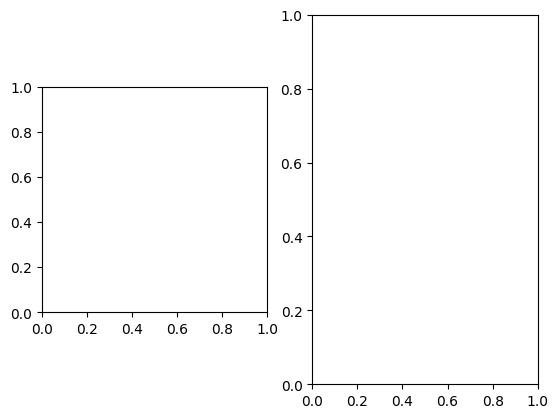

In [106]:
fig , ax = plt.subplots(1,2)
ax[0].imshow(
    build_mel_calculation_graph(tf.constant(data1,dtype=tf.float32))[...,0]
    )
ax[1].imshow(
    build_mel_calculation_graph(tf.constant(data2,dtype=tf.float32))[...,0]
    )

In [99]:
inpShape=(148,64,1)
model = tf.keras.applications.EfficientNetB0(include_top=False,weights=None,input_shape=inpShape)
model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_29      │ (None, 148, 64,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 148, 64,   │          0 │ input_layer_29[0… │
│ (Rescaling)         │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 148, 64,   │          3 │ rescaling_3[0][0] │
│ (Normalization)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 149, 65,   │          0 │ normalization_3[… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 74, 32,    │        288 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 74, 32,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 74, 32,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 74, 32,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 74, 32,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 74, 32,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 74, 32,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 74, 32,    │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 74, 32,    │         64 │ block1a_project_

 Total params: 4,048,991 (15.45 MB)

 Trainable params: 4,006,972 (15.29 MB)

 Non-trainable params: 42,019 (164.14 KB)

In [100]:
def l2_reg_output(x):
    return tf.keras.backend.l2_normalize(x,axis=1)

outputLayer = model.get_layer('block4c_add').output
x = tf.keras.layers.Conv2D(32,3,padding="same",name="extra_conv1",kernel_regularizer="l2")(outputLayer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(64,3,padding="same",name = "extra_conv2",kernel_regularizer="l2")(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(x.shape[1]//2, x.shape[2]//2), strides=None, padding="valid")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128,kernel_regularizer="l2")(x)
x = tf.keras.layers.Lambda(l2_reg_output)(x)

baseNetwork = tf.keras.Model(inputs=model.input,outputs=x,name="basemodel")
baseNetwork.summary()

Model: "basemodel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_29      │ (None, 148, 64,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 148, 64,   │          0 │ input_layer_29[0… │
│ (Rescaling)         │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 148, 64,   │          3 │ rescaling_3[0][0] │
│ (Normalization)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 149, 65,   │          0 │ normalization_3[… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 74, 32,    │        288 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 74, 32,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 74, 32,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 74, 32,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 74, 32,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 74, 32,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 74, 32,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 74, 32,    │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 74, 32,    │         64 │ block1a_project_

 Total params: 390,871 (1.49 MB)

 Trainable params: 382,612 (1.46 MB)

 Non-trainable params: 8,259 (32.27 KB)

In [101]:
def triplet_loss(y_true,y_pred):
    match_loss =  y_true * -2.0 * tf.math.log( 1 - y_pred/2 ) 
    mismatch_loss =  tf.maximum((1 - y_true) * ( -tf.math.log(y_pred/0.2) ) ,0)

    return tf.reduce_mean( match_loss + mismatch_loss )

def accuracy(y_true ,y_pred):
    threshold_check = tf.cast(tf.less_equal(y_pred,0.2),dtype=tf.float32)
    return tf.keras.metrics.binary_accuracy(y_true,threshold_check)

##Test code
t = tf.constant((1.0,1.0,1.0,1.0,1.0,1.0))
q = t - 0

print(triplet_loss(t,q))
print(accuracy(t,q))

tf.Tensor(1.3862944, shape=(), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0.], shape=(6,), dtype=float32)


In [102]:
# Define constants
BATCH_SIZE = 64
EPOCHS = 25
chunkedNoisePath = r"C:\Users\jeeva\Videos\Efficient_word_net\NoiseChunked"
datasetPath = r"C:\Users\jeeva\Videos\Efficient_word_net\test"
inpShape = (148, 64, 1)

In [103]:

# Create the CustomDataGen for training and testing
training_generator = CustomDataGen(chunkedNoisePath, datasetPath, batch_size=BATCH_SIZE)
test_generator = CustomDataGen(chunkedNoisePath, datasetPath, batch_size=BATCH_SIZE, training_generator=False)

# Define the Siamese model (inputs and architecture need to match your problem setup)
input_1 = tf.keras.layers.Input(shape=inpShape)
input_2 = tf.keras.layers.Input(shape=inpShape)

processed_1 = baseNetwork(input_1)
processed_2 = baseNetwork(input_2)

distance = tf.keras.layers.Lambda(lambda tensors: tf.keras.backend.abs(tensors[0] - tensors[1]))([processed_1, processed_2])
output = tf.keras.layers.Dense(1, activation='sigmoid')(distance)

siamese_model = tf.keras.Model(inputs=[input_1, input_2], outputs=output)

# Compile the model
adam = tf.keras.optimizers.Adam(1e-5)
siamese_model.compile(optimizer=adam, loss=triplet_loss, metrics=[accuracy])

##########################################
for X_batch, Y_batch in training_generator:
    print(f"Shape of training batch X: {X_batch.shape}")
    print(f"Shape of training batch Y: {Y_batch.shape}")
    break  # Just check for the first batch

for X_batch, Y_batch in test_generator:
    print(f"Shape of validation batch X: {X_batch.shape}")
    print(f"Shape of validation batch Y: {Y_batch.shape}")
    break  # Just check for the first batch


# Callbacks for training
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=r"C:\Users\jeeva\Videos\Efficient_word_net\Checkpoints\model-{epoch:02d}-loss_{loss:.3f}_val_acc{val_accuracy:.3f}.keras", 
        monitor='val_accuracy',
        save_best_only=False
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='loss', factor=0.1, patience=2, min_lr=1e-5
    ),
]
# Train the model with the adjusted generators
history = siamese_model.fit(
    training_generator,
    epochs=25,
    validation_data=test_generator,
    callbacks=my_callbacks
)

train size: 21157
test size: 2351


AttributeError: 'tuple' object has no attribute 'shape'